In [1]:
import os
os.chdir(r"C:\Users\Eduardo\Documents\CARRERA\Udemy\deep_learning\course_2\week5\Initialization") # change path in order to

# Weight Initalization
Weight initialization is extremly important. Deep Neural Networks face gradiant vanishing or gradiant exploding  based on initailization 

\begin{equation*}
W>I .... W^L
\end{equation*}

\begin{equation*}
W<I .... \frac{1}{W^L}
\end{equation*}

Where $ I $ is the identity 
<br>
In order to emphasis the importance importnace of intialization we will implement different intializations:
* **Zero Intialization**
* **Random Initalization** 
* **He Initalization** $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$


In [2]:
from init_utils import  predict, load_dataset, plot_decision_boundary, predict_dec # Improt data set
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
%matplotlib inline

In [1]:
# colors for print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BLUE + "6/20/2020"+ color.END)

6/20/2020


### 1. Load Dataset:

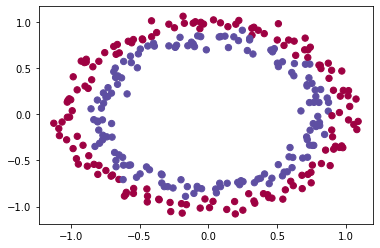

In [3]:
# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

## Getting to know the Dataset

In [4]:
m_train= train_X.shape[1]
m_test = test_X.shape[1] 
print("SUMMARY OF DATA SET: \n")
print("size of trainning data: ",m_train)
print("size of test data: ",m_test,"\n")

print("X_train:",train_X.shape,"y_train",train_Y.shape)
print("X_test:",test_X.shape,"y_test",test_Y.shape)

SUMMARY OF DATA SET: 

size of trainning data:  300
size of test data:  100 

X_train: (2, 300) y_train (1, 300)
X_test: (2, 100) y_test (1, 100)


## Lets create Functions for differnt Intialization methods
Workflow: create different Initalizations. feed Neural Net, see which initalization works better

In [5]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    """
    parameters = {}
    L = len(layers_dims) # number of layers in the network
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
    return parameters

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] =  np.random.randn(layers_dims[l], layers_dims[l-1])*.1
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###

    return parameters

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters

## Activation Function Library 

In [6]:
#Activation Functions:
def Sigmoid(Z):
    s = 1/(1+np.exp(-Z))
    return s

def Tanh(Z):
    t = np.tanh(Z)
    return t

def ReLU(Z):
    return Z * (Z > 0)

# Derivatives of Activation Functions:

def dSigmoid(A):
    return A*(1-A)

def dTanh(A):
    return 1-Tanh(A)**2

def dReLU(Z):
    return 1. * (Z > 0)

In [1]:
m=m_train
learning_rate = 0.01
layers_dims=[train_X.shape[0], 10, 5, 1]
print("Neural Network Architecture:",layers_dims)
# We will create a dictionary with all the parameters from different initalization methods to run the Neural Net with them:
parameterss={}
parameterss["parameters1"] = initialize_parameters_zeros(layers_dims)
parameterss["parameters2"]= initialize_parameters_random(layers_dims)
parameterss["parameters3"]= initialize_parameters_he(layers_dims)
Initalization_methods=["nothing","Zero","Random","He"]

NameError: name 'm_train' is not defined

Zero  Initalization

Accuracy on Train data: 50.0 %
Accuaracy on Test data: 50.0 %


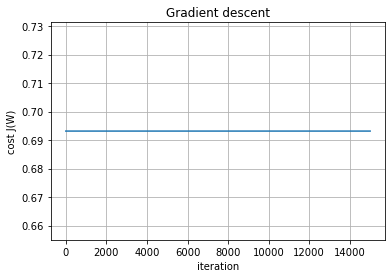

Random  Initalization

Accuracy on Train data: 60.0 %
Accuaracy on Test data: 56.99999999999999 %


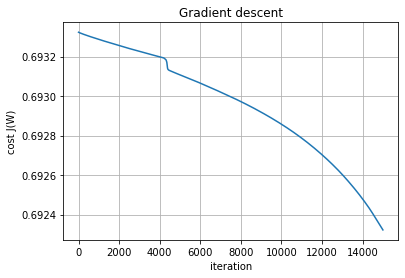

He  Initalization

Accuracy on Train data: 99.33333333333333 %
Accuaracy on Test data: 96.0 %


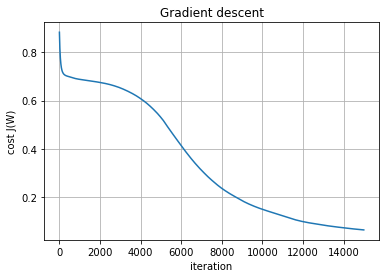

In [12]:
for pa in range(1,4):
    parameters=parameterss["parameters"+str(pa)]


    costs = []
    for iteration in range(0,15000):


        #Activation Topology:

        Activations=["ReLU","ReLU","Sigmoid"] # L-1 Activations

        ##feedforward wit for: 

        forward = {}
        forward["A" + str(0)] =train_X

        for i in range(1,len(layers_dims)):
            forward["Z" + str(i)] =  parameters["W"+ str(i)].dot(forward["A" + str(i-1)])  + parameters["b"+ str(i)]
            if Activations[i-1] =="ReLU":
                forward["A" + str(i)] = ReLU(forward["Z" + str(i)])
            elif Activations[i-1] == "Sigmoid":
                forward["A" + str(i)] = Sigmoid(forward["Z" + str(i)])

        ###Cost


        logprobs =  train_Y* np.log(forward["A" + str(i)]) + (1-train_Y) * np.log(1- forward["A" + str(i)])
        cost = (-1/m)* np.sum(logprobs)
        costs.append(cost)


        ####Back Prop

        gradiants = {}
        gradiants["dA" +str(i)] = - (np.divide(train_Y, forward["A" + str(i)]) - np.divide(1 - train_Y, 1 - forward["A" + str(i)]))
        gradiants["dZ" +str(i)] = gradiants["dA" +str(i)]*dSigmoid(forward["A" + str(i)])

        for i in range(len(layers_dims)-1,0,-1): 
            gradiants['W' + str(i)]=1 / m *gradiants["dZ" +str(i)].dot(forward["A" + str(i-1)].T)
            gradiants['b' + str(i)]=1 / m * np.sum(gradiants["dZ" +str(i)], axis=1, keepdims=True)

            if i > 1: #  There is no need to calculate  dA0 and dZ0 (since A0 = inpunt and Z0 does not exist)

                gradiants["dA" +str(i-1)] = parameters["W"+ str(i)].T.dot(gradiants["dZ" +str(i)])
                gradiants["dZ" +str(i-1)] = gradiants["dA" +str(i-1)] * dReLU(forward["Z" + str(i-1)])


        for i in range(len(layers_dims)-1,0,-1): 
            parameters['W' + str(i)]=parameters['W' + str(i)] - learning_rate*gradiants['W' + str(i)]
            parameters['b' + str(i)]=parameters['b' + str(i)] - learning_rate*gradiants['b' + str(i)]


    # Meassuring performance

    prediction_train=(forward["A" + str(len(layers_dims)-1)] >= 0.5).astype(int)
    accuracy_train=(prediction_train==train_Y).astype(int).sum()/m*100
    mt=test_X.shape[1]

    forward = {}
    forward["A" + str(0)] =test_X

    for i in range(1,len(layers_dims)):
        forward["Z" + str(i)] =  parameters["W"+ str(i)].dot(forward["A" + str(i-1)])  + parameters["b"+ str(i)]
        if Activations[i-1] =="ReLU":
            forward["A" + str(i)] = ReLU(forward["Z" + str(i)])
        elif Activations[i-1] == "Sigmoid":
            forward["A" + str(i)] = Sigmoid(forward["Z" + str(i)])

    prediction_test=(forward["A" + str(len(layers_dims)-1)] >= 0.5).astype(int)
    accuracy_test=(prediction_test==test_Y ).astype(int).sum()/mt*100
    
    print(color.BLUE + Initalization_methods[pa]+"  Initalization"+ color.END)
    
    print("\nAccuracy on Train data:",accuracy_train,"%\nAccuaracy on Test data:",accuracy_test,"%")
    plt.plot(costs)
    plt.title("Gradient descent")
    plt.xlabel("iteration")
    plt.ylabel("cost J(W)")
    plt.grid()
    plt.show()

##  Conclusions

You have seen three different types of initializations. For the same number of iterations and same hyperparameters the comparison is:

<font color='blue'>
- Different initializations lead to different results <br>
- Random initialization is used to break symmetry and make sure different hidden units can learn different things <br>
- Don't intialize to values that are too large (your gradientes will explode) <br>
- Don't intialize to values that are too small (your gradientes will vanish) <br>
- He initialization works well for networks with ReLU activations. <br>